In [1]:
#3.2 Ejemplo 1: PCA
# -*- coding: utf-8 -*- 
# # PCA

# Librerías 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
### Data Preprocessing 
# Dataset 
dataset = pd.read_csv('train.csv', encoding='utf-8') 
# Eliminar columnas con NaN 
dataset_f = dataset[["MSSubClass", "LotFrontage", "LotArea", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", "PoolArea", "YrSold", "SalePrice"]].dropna()
dataset_f.describe()

,MSSubClass,LotFrontage,LotArea,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,56.113576,70.683230,10120.070098,1978.543035,1.880213,503.465839,92.308784,46.520852,21.728483,16.015084,2.919255,2007.795031,185827.104703
std,41.746693,24.261598,8110.632788,25.828916,0.653471,191.050853,121.755231,64.720668,61.139279,57.659538,40.115349,1.333292,83212.656225
min,20.000000,21.000000,1300.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7593.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,131200.000000
50%,50.000000,70.000000,9430.000000,1981.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,2008.000000,165000.000000
75%,70.000000,80.000000,11361.500000,2003.000000,2.000000,600.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,648.000000,2010.000000,755000.000000


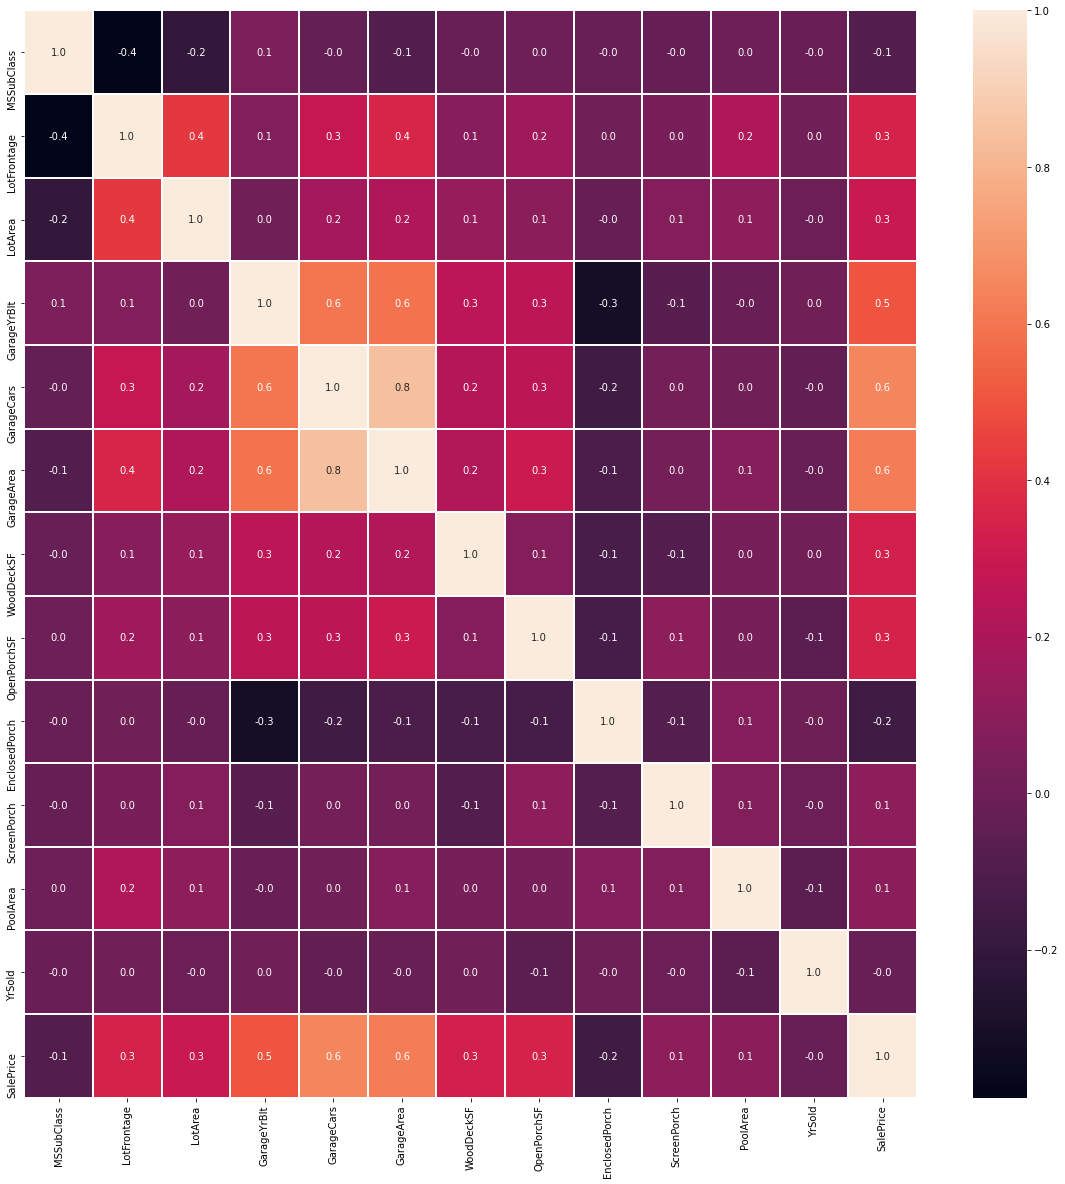

In [2]:
f,ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(dataset_f.corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax) 
plt.show()

In [3]:
X = dataset_f.iloc[:, 0:len(dataset_f.columns)-1].values 
y = dataset_f.iloc[:, len(dataset_f.columns)-1].values 

# Train/Test Split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

### PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = None) # 'None' para que conserven en principio todas las PC 

X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 

# Se crea este vector para que diga la varianza explicada por cada escenario de PCAs y 
# ver que % de varianza explica cada componente. Se Extraen todas las indep. variables 
# porque se ha puesto 'None', pero se tiene un vector que ordena las que hay, el % que explican... 
# Se va sumando a medida que baja por el vector la varianza que explicaría si se cogen 2 variables, 3... 

explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC") 
print(explained_variance) 
var_exp = np.round(np.sum(explained_variance[0:5]),4) 
print("Con 5 PC se explicaría el {var}% de la varianza".format(var=var_exp*100)) 
# Con los 5 principales, se ve que el 65.3% de la varianza

Varianza Explicada por cada PC
[0.24854763 0.13893733 0.09496065 0.08854637 0.08198928 0.07560913
 0.06740538 0.06345014 0.06113139 0.03850164 0.02926562 0.01165545]
Con 5 PC se explicaría el 65.3% de la varianza


Varianza Explicada por cada PC
[0.24854763 0.13893733 0.09496065 0.08854637 0.08198928]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]
 [-0.4555225   0.51928677  0.43502287 -0.34937079 -0.10860442 -0.03374627
  -0.10764765 -0.08887951  0.28202868  0.10957175  0.29571177 -0.01107928]
 [ 0.15950198 -0.05380079 -0.06270658 -0.0042181  -0.0424313  -0.02876179
  -0.31119491  0.35065666 -0.16870266  0.59780708  0.32110525 -0.50630247]
 [ 0.33602157 -0.01242243 -0.13793128  0.00139586  0.13998025  0.16003592
   0.00720798 -0.04141266  0.55344267 -0.4441011   0.42678321 -0.36778633]
 [ 0.39392582 -0.01999574  0.05907858  0.01778296 -0.08926949 -0.07006996
   0.31054968 -0.08715655 -0.02454635  0.27747663  0.56414618  0.57257591]]


<AxesSubplot:xlabel='PC', ylabel='var'>

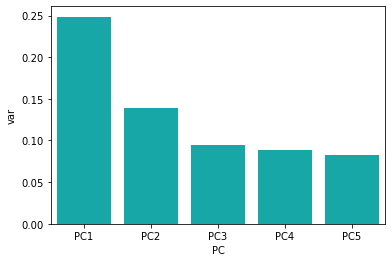

In [4]:
# Se entrena solo para esas 5 componentes principales 
pca = PCA(n_components = 5) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print("Varianza Explicada por cada PC") 
print(explained_variance) 
print("Parámetros del Modelo") 
print(pca.components_) 

# Visualizacion de las PC 
sns.barplot(x='PC',y="var", data=pd.DataFrame({'var':explained_variance, 'PC':['PC1','PC2','PC3','PC4', 'PC5']}), color="c")

In [5]:
### Modelo de Regresión 
# Con las PCA se construye un modelo de regresión 
# Regresion Lineal 
import statsmodels.api as sm 
model = sm.OLS(y_train, X_train_pca).fit() 
model.summary() # Se ve que la PC realmente relevante es solo la primera

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              17.70
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    1.05e-16
Time:                        19:19:19   Log-Likelihood:                         -11508.
No. Observations:                 845   AIC:                                  2.303e+04
Df Residuals:                     840   BIC:                                  2.305e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.721e+04   3970.502      9.372      0.000    2.94e+04     4.5e+04
x2          1550.6954   5310.565      0.292      0.770   -8872.840     1.2e+04
x3          2292.1656   6423.598      0.357      0.721   -1.03e+04    1.49e+04
x4          -833.0923   6652.193     -0.125      0.900   -1.39e+04    1.22e+04
x5          4719.8690   6913.081      0.683      0.495   -8849.072    1.83e+04
==============================================================================
Omnibus:                      316.504   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4291.928
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                      13.726   Cond. No.                         1.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# RF Random Forest
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100) 
model.fit(X_train_pca, y_train) 
print("Relevancia de los parámetros") 
print(model.feature_importances_) # Aparentemente con la primera componente artificial construida es suficiente

Relevancia de los parámetros
[0.83549123 0.04545186 0.03010247 0.0459853  0.04296915]


In [7]:
# Predicciones 
y_pred = model.predict(X_test_pca) 
# Metricas de evaluacion 
from sklearn.metrics import mean_squared_error, r2_score 
r2 = r2_score(y_test, y_pred) 
mae = mean_squared_error(y_test, y_pred) 
print("r2: ", r2, "mae: ", mae)

r2:  0.46509156602258606 mae:  2302968682.6760144


In [9]:
# Usando solo 1 PC 
pca = PCA(n_components = 1) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print("Varianza Explicada por cada PC") 
print(explained_variance) 
print("Parámetros del Modelo") 
print(pca.components_)

Varianza Explicada por cada PC
[0.24854763]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]]


In [10]:
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100) 
model.fit(X_train_pca, y_train) 
y_pred = model.predict(X_test_pca) 
r2 = r2_score(y_test, y_pred) 
mae = mean_squared_error(y_test, y_pred) 
print("r2: ", r2, "mae: ", mae) # Mejoran, de hecho, los resultados

r2:  0.4838564765524249 mae:  2222179152.0976634


In [11]:
# Usando 2 PC para visualizar 
pca = PCA(n_components = 2) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print("Varianza Explicada por cada PC") 
print(explained_variance) 
print("Parámetros del Modelo") 
print(pca.components_)

Varianza Explicada por cada PC
[0.24854763 0.13893733]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]
 [-0.4555225   0.51928677  0.43502287 -0.34937079 -0.10860442 -0.03374627
  -0.10764765 -0.08887951  0.28202868  0.10957175  0.29571177 -0.01107928]]


r2:  0.488549471073663 mae:  2201974162.3763056


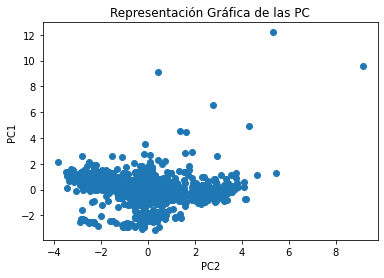

In [12]:
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100) 
model.fit(X_train_pca, y_train) 
y_pred = model.predict(X_test_pca) 
r2 = r2_score(y_test, y_pred) 
mae = mean_squared_error(y_test, y_pred) 
print("r2: ", r2, "mae: ", mae) 
plt.scatter(X_train_pca[:,0], X_train_pca[:,1]) 
plt.ylabel("PC1") 
plt.xlabel("PC2")
plt.title("Representación Gráfica de las PC") 
plt.show()